In [1]:
from lookback_ops import *

In [2]:
config = ModelConfig(max_sequence_length=15, annotation_number=10,
                       adaption_layer_filters=[1024, 1024, 1024],
                       net_global_dim=[64, 256],
                       net_max_features_nums=512,
                       stages=[6]
                       )
  config.finish()

IndentationError: unexpected indent (<ipython-input-2-a1aea29d4474>, line 7)

In [3]:
config = ModelConfig(max_sequence_length=15, annotation_number=10,
                       adaption_layer_filters=[1024, 1024, 1024],
                       net_global_dim=[64, 256],
                       net_max_features_nums=512,
                       stages=[6]
                       )
config.finish()

FileNotFoundError: [Errno 2] No such file or directory: '/home/litiange/prp_file/model/6-10'

In [4]:
config = ModelConfig(max_sequence_length=15, annotation_number=10,
                       adaption_layer_filters=[1024, 1024, 512],
                       net_global_dim=[128, 256],
                       net_max_features_nums=512,
                       stages=[6],
                       GRAND_PARENT_PATH='/Users/junr/Documents/prp/pic_data',
                       IMAGE_PARENT_PATH='/Users/junr/Documents/prp/pic_data/pic_data'
                       )
config.finish()

In [5]:
l = test_lb_vgg(config)

ValueError: Dimensions must be equal, but are 64 and 128 for 'BiasAdd' (op: 'BiasAdd') with input shapes: [1,128,320,64], [128].

In [1]:
from lookback_ops import *

In [2]:
def return_a_config():
  config = ModelConfig(max_sequence_length=15, annotation_number=10,
                       adaption_layer_filters=[1024, 1024, 512],
                       net_global_dim=[128, 256],
                       net_max_features_nums=512,
                       stages=[6],
                       GRAND_PARENT_PATH='/Users/junr/Documents/prp/pic_data',
                       IMAGE_PARENT_PATH='/Users/junr/Documents/prp/pic_data/pic_data'
                       )
  config.finish()
  return config

In [3]:
config = return_a_config()

In [4]:
a = test_lb_vgg(config)

ValueError: Dimensions must be equal, but are 64 and 128 for 'BiasAdd' (op: 'BiasAdd') with input shapes: [1,128,320,64], [128].

In [5]:
def lb_tf_vgg(net, mask, output_layer):
  """
  net: tensor
  mask: placeholder need to be feeded
  output_layer: like 'conv1' 'vgg_16/conv1', '1'
  """
  # has to be one of ['vgg_16/conv4', 'vgg_16/conv3', 'vgg_16/conv2', 'vgg_16/conv1']
  # vgg part
  vgg_output_layer = int(output_layer[-1])
  vgg_conv = [[1, [2, 1]],
              [2, [2, 1]],
              [3, [3, 2, 1]],
              [4, [3, 2, 1]]]
  # vgg part
  for first_conv_idx in range(vgg_output_layer-1, -1, -1):
    first_conv = vgg_conv[first_conv_idx][0]
    for second_conv in vgg_conv[first_conv_idx][1]:
      conv_name = 'vgg_16/conv%s/conv%s_%s/' % (str(first_conv), str(first_conv), str(second_conv))
      weights = conv_name + 'weights:0'
      bias = conv_name + 'biases:0'
      # get tensor
      w_tensor = my_get_variables_by_name(weights)[0]
      bias_tensor = my_get_variables_by_name(bias)[0]
      # output_shape, for filters, shape[-2] is the input, [-1] is the output in inference
      # but for lookback, [-2] is the output, [-1] is the input
      output_filters = w_tensor.get_shape().as_list()[-2]
      output_shape = [1, int(128 / (2 ** (first_conv - 1))), int(320 / (2 ** (first_conv - 1))), output_filters]
      # unrelu
      net = tf.nn.relu(net)
      # unbiases
      net = tf.nn.bias_add(net, tf.negative(bias_tensor))
      # unconv
      net = tf.nn.conv2d_transpose(net, w_tensor,
                                   output_shape=output_shape,
                                   strides=[1, 1, 1, 1])
    if first_conv != 1:
      # unpool
      net = unpool2x2(net, mask[first_conv - 2])
  return net

In [6]:
a = test_lb_vgg(config)

ValueError: Variable vgg_16/conv1/conv1_1/weights already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 216, in variable
    use_resource=use_resource)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 181, in func_with_args
    return func(*args, **current_args)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 261, in model_variable
    use_resource=use_resource)


In [1]:
from lookback_ops import *

In [2]:
config = return_a_config()

In [3]:
a = test_lb_vgg(config)

TypeError: 'Dataset' object does not support indexing

In [1]:
from lookback_ops import *
config = return_a_config()
a = test_lb_vgg(config)

FailedPreconditionError: Attempting to use uninitialized value adaption/adaption_output/bias
	 [[Node: adaption/adaption_output/bias/read = Identity[T=DT_FLOAT, _class=["loc:@adaption/adaption_output/bias"], _device="/job:localhost/replica:0/task:0/cpu:0"](adaption/adaption_output/bias)]]

Caused by op 'adaption/adaption_output/bias/read', defined at:
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-d2d28597c303>", line 3, in <module>
    a = test_lb_vgg(config)
  File "/Users/junr/Desktop/keras_model/lookback_ops.py", line 277, in test_lb_vgg
    adaption_output, net1m, net2m, net3m, net_max_feature = forward_model(images, config)
  File "/Users/junr/Desktop/keras_model/lookback_ops.py", line 259, in forward_model
    adaption_output, net1m, net2m, net3m, net_max_feature = max_model(images, config)
  File "/Users/junr/Desktop/keras_model/lookback_ops.py", line 113, in max_model
    activation=None, name='adaption_output')
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/layers/core.py", line 215, in dense
    return layer.apply(inputs)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 503, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 443, in __call__
    self.build(input_shapes[0])
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/layers/core.py", line 125, in build
    trainable=True)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 383, in add_variable
    trainable=trainable and self.trainable)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 1065, in get_variable
    use_resource=use_resource, custom_getter=custom_getter)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 962, in get_variable
    use_resource=use_resource, custom_getter=custom_getter)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 367, in get_variable
    validate_shape=validate_shape, use_resource=use_resource)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 352, in _true_getter
    use_resource=use_resource)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 725, in _get_single_variable
    validate_shape=validate_shape)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 199, in __init__
    expected_shape=expected_shape)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 330, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1400, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value adaption/adaption_output/bias
	 [[Node: adaption/adaption_output/bias/read = Identity[T=DT_FLOAT, _class=["loc:@adaption/adaption_output/bias"], _device="/job:localhost/replica:0/task:0/cpu:0"](adaption/adaption_output/bias)]]


In [1]:
from lookback_ops import *
config = return_a_config()
a = test_lb_vgg(config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


ValueError: Cannot feed value of shape (15, 128, 320, 64) for Tensor 'Placeholder_2:0', which has shape '(1, 128, 320, 64)'

In [1]:
from lookback_ops import *
config = return_a_config()
a = test_lb_vgg(config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


In [2]:
a.shape

AttributeError: 'list' object has no attribute 'shape'

In [3]:
len(a)

15

In [4]:
b = a[0]

In [5]:
b.shape

AttributeError: 'list' object has no attribute 'shape'

In [6]:
b[0].shape

(128, 320, 3)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
tmp_img = b[0]

In [9]:
np.max(tmp_img_)

NameError: name 'tmp_img_' is not defined

In [10]:
np.max(tmp_img)

90.723625

In [11]:
np.min(tmp_img)

-151.05327

In [12]:
def normalize(imgs):
  min = np.min(imgs)
  max = np.max(imgs)
  return (imgs - min) / (max - min)

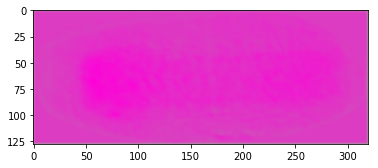

In [13]:
plt.imshow(normalize(tmp_img))

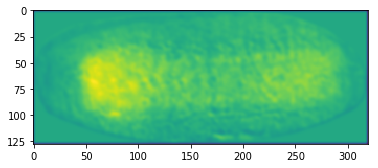

In [14]:
plt.imshow(normalize(tmp_img[...,0]))

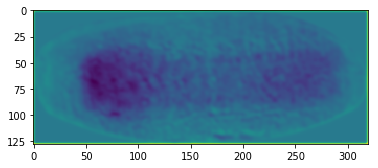

In [15]:
plt.imshow(normalize(tmp_img[...,1]))

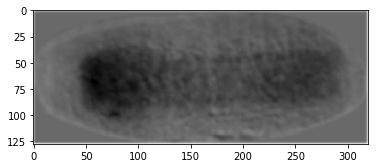

In [16]:
plt.imshow(normalize(tmp_img[..., 1]), cmap ='gray')

In [17]:
def get_top_activation2d(img, top_k=10):
  """Get the top activation in 2d image.
  Return: img with only top_k numbers kept.
  """
  tmp = img.flatten()
  tmp[np.argsort(tmp)[:-top_k]] = 0
  return tmp.reshape(img.shape)

In [18]:
a = np.array([[1,2,3,4],[4,5,6,7]])

In [19]:
a

array([[1, 2, 3, 4],
       [4, 5, 6, 7]])

In [20]:
v=get_top_activation2d(a, 3)

In [21]:
v

array([[0, 0, 0, 0],
       [0, 5, 6, 7]])

In [22]:
config

In [23]:
def test_lb_vgg(config, output_layer='conv1', top_k_activation=5):
  """Give an image, get the output of conv1, return the
  look back image of it.
  Args:
    conv1_output: output of a group(batch) of images through vgg model,
                  which is infer_output[1] in lookback.py
    vgg_conv_output: ndarray, used to get mask
    netXm: output of vgg/conv* before max pooling
  """
  # get the index of vgg output layer
  vgg_output_layer = int(output_layer[-1])
  shape_feed = [1, 128, 320, 32 * (2 ** vgg_output_layer)]

  # build forward model
  images = tf.placeholder(tf.float32, [config.max_sequence_length, 128, 320, 3])
  adaption_output, net1m, net2m, net3m, net_max_feature = forward_model(images, config)

  # build model
  feed_input = tf.placeholder(tf.float32, shape_feed) # input for deconv model
  feed_m1 = tf.placeholder(tf.float32, shape=[1, 128, 320, 64]) # mask for vgg/conv1
  feed_m2 = tf.placeholder(tf.float32, shape=[1, 64, 160, 128]) # mask for vgg/conv2
  feed_m3 = tf.placeholder(tf.float32, shape=[1, 32, 80, 256])  # mask for vgg/conv3
  ori_img_output = lb_tf_vgg(feed_input, [feed_m1, feed_m2, feed_m3], output_layer)

  # build sess
  sess = tf.Session()

  # restore
  all_vars = tf.global_variables()
  saver = tf.train.Saver(all_vars)
  saver.restore(sess, '/Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt')

  # prepare the data
  ds = config_to_dataset(config)
  binarizer = MultiLabelBinarizer(classes=ds.vocab)
  i, l = dataset_element_to_batch_data(ds.raw_dataset[66], binarizer, config) # just pick one randomly

  # run forward model
  infer_output = sess.run([adaption_output, net1m, net2m, net3m, net_max_feature],
                          feed_dict={
                            images: i
                          })

  # conv1_output: output of a group(batch) of images through vgg model,
  #                 which is infer_output[1] in lookback.py
  # vgg_conv_output: ndarray, used to get mask
  vgg_conv_output = [infer_output[1], infer_output[2], infer_output[3]]
  conv_output = vgg_conv_output[vgg_output_layer - 1]

  # batch_img_list: element for every batch
  batch_img_list = []
  for single_batch in range(conv_output.shape[0]):
    # top_activation: [1, 128, 320, top_k_activation]
    # this is top activated among kernels, but what if we want to get
    # top activated in a single image.
    # do that in inner loop
    top_activation, top_activation_index = get_top_activation(
                conv_output[single_batch][None, :], top_k=top_k_activation)

    # img_list: element for every top activation img
    img_list = []
    for idx in range(top_k_activation):
      # build feed dict for deconv model
      img_to_feed = top_activation[..., idx]
      # img_to_feed means top activation among different kernels
      # next we want get top activation in an img
      # img_to_feed has batch 1
      img_to_feed[0] = get_top_activation2d(img_to_feed[0], 5)

      img_to_feed_idx = top_activation_index[idx]
      tensor_to_feed = np.zeros(shape_feed)
      tensor_to_feed[..., img_to_feed_idx] = img_to_feed

      sess_output = sess.run([ori_img_output], feed_dict={
        feed_input: tensor_to_feed,
        feed_m1: array_to_mask(vgg_conv_output[0][single_batch, ...][None, :]),
        feed_m2: array_to_mask(vgg_conv_output[1][single_batch, ...][None, :]),
        feed_m3: array_to_mask(vgg_conv_output[2][single_batch, ...][None, :])
      })
      img_list.append(sess_output[0][0])
    batch_img_list.append([img_list, i[single_batch]])
  return batch_img_list

In [24]:
a = test_lb_vgg(config)

ValueError: Variable vgg_16/conv1/conv1_1/weights already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 216, in variable
    use_resource=use_resource)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 181, in func_with_args
    return func(*args, **current_args)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 261, in model_variable
    use_resource=use_resource)


In [1]:
from lookback_ops import *
config = return_a_config()
test_lb_vgg(config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


[[[array([[[-2.28044844,  0.49457717, -1.9583627 ],
           [-5.48278618, -1.74174953, -5.09784126],
           [-6.31425667, -2.77920866, -5.79542685],
           ..., 
           [-6.31425667, -2.77920866, -5.79542685],
           [-5.46829748, -1.76422811, -4.95740986],
           [-4.30620766, -1.82883024, -3.61231971]],
   
          [[ 0.20059264,  4.36650085, -0.24547505],
           [-2.58756208,  3.0385077 , -3.45700693],
           [-3.64870238,  1.67860866, -4.39372253],
           ..., 
           [-3.64870238,  1.67860866, -4.39372253],
           [-2.31245565,  3.29749918, -3.03393006],
           [-2.57740641,  1.1649667 , -2.48324513]],
   
          [[ 1.52714419,  5.69832039,  0.62802637],
           [-0.68558073,  4.94700241, -2.27060366],
           [-1.85801291,  3.4586494 , -3.34421706],
           ..., 
           [-1.85801291,  3.4586494 , -3.34421706],
           [-0.52453709,  5.09367609, -1.91807961],
           [-1.65465999,  2.05710411, -1.91462374]],
  

In [1]:
from lookback_ops import *
config = return_a_config()
b = test_lb_vgg(config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


In [2]:
batch_img_list = b

In [3]:
single_batch = batch_img_list[0]

In [4]:
single_batch.shape

AttributeError: 'list' object has no attribute 'shape'

In [5]:
len(single_batch)

2

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.imshow(single_batch[1])

In [8]:
plt.show()

ValueError: Floating point image RGB values must be in the 0..1 range.

In [9]:
plt.imshow(single_batch[1]/2.0+0.5)

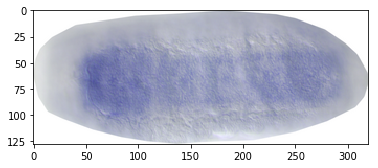

In [10]:
plt.show()

In [11]:
lb_imgs = single_batch[0]

In [12]:
len(lb_imgs)

5

In [13]:
lb_imgs_s = lb_imgs[0]

In [14]:
lb_imgs_s.shape

(128, 320, 3)

In [15]:
np.max(lb_imgs_s)

29.887991

In [16]:
np.min(lb_imgs_s)

-47.761768

In [17]:
lb_imgs_s

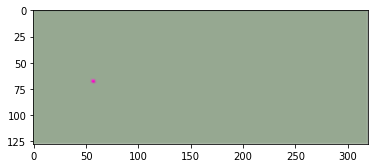

In [18]:
plt.show()

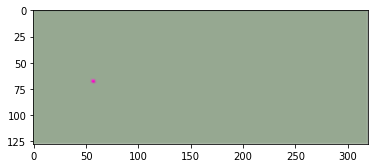

In [19]:
%matplotlib inline
plt.imshow(normalize(lb_imgs_s), cmap ='gray')

In [1]:
from lookback_ops import *

In [2]:
config = return_a_config()

In [1]:
from lookback_ops import *
config = return_a_config()
batch_img_list, labels, stage = test_lb_vgg(config)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


AttributeError: module 'skimage.io' has no attribute 'save'

In [1]:
from lookback_ops import *
config = return_a_config()
batch_img_list, labels, stage = test_lb_vgg(config)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG328096/11.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG328096/12.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG328096/21.bmp is a low contrast image

In [1]:
from lookback_ops import *
config = return_a_config()
batch_img_list, labels, stage = test_lb_vgg(config)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG328096/1/1.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG328096/2/1.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG328096/3/1.bmp is a low contrast im

In [1]:
from lookback_ops import *
config = return_a_config()
batch_img_list, labels, stage = test_lb_vgg(config, output_layer='conv2', top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config)


INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


ValueError: could not broadcast input array from shape (1,64,160) into shape (1,128,320)

In [1]:
from lookback_ops import *
config = return_a_config()
batch_img_list, labels, stage = test_lb_vgg(config, output_layer='conv2', top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


TypeError: 'float' object cannot be interpreted as an integer

In [1]:
from lookback_ops import *
config = return_a_config()
batch_img_list, labels, stage = test_lb_vgg(config, output_layer='conv2', top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


TypeError: simple_save_result_from_test_lb() missing 1 required positional argument: 'output_layer'

In [2]:
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, 'conv2')

/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='conv1'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG328096/conv1/1/4.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG328096/conv1/2/4.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG328096/conv1/3/4.bmp is

In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='conv3'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='conv4'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


IndexError: list index out of range

In [ ]:
from lookback_ops import *
config = return_a_config()
output_layer='conv4'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='conv4'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [ ]:
from lookback_ops import *
config = return_a_config()
output_layer='conv4'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=10)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='conv4'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='conv4'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=20)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='conv4'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=4)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [ ]:
from lookback_ops import *
config = return_a_config()
output_layer='conv2'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='conv4'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [ ]:

from lookback_ops import *
config = return_a_config()
output_layer='conv2'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)





INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


In [ ]:
def test_lb_vgg(config, output_layer='conv1', top_k_activation=2):
  """Give an image, get the output of conv1, return the
  look back image of it.
  Args:
    conv1_output: output of a group(batch) of images through vgg model,
                  which is infer_output[1] in lookback.py
    vgg_conv_output: ndarray, used to get mask
    netXm: output of vgg/conv* before max pooling
  """
  # get the index of vgg output layer
  vgg_output_layer = int(output_layer[-1])
  shape_feed = [1, int(256/(2**vgg_output_layer)), int(640/(2**vgg_output_layer)), 32 * (2 ** vgg_output_layer)]

  # build forward model
  images = tf.placeholder(tf.float32, [config.max_sequence_length, 128, 320, 3])
  adaption_output, net1m, net2m, net3m, vgg_out, adaption_conv_output, net_max_feature = forward_model(images, config)

  # build model
  feed_input = tf.placeholder(tf.float32, shape_feed) # input for deconv model
  feed_m1 = tf.placeholder(tf.float32, shape=[1, 128, 320, 64]) # mask for vgg/conv1
  feed_m2 = tf.placeholder(tf.float32, shape=[1, 64, 160, 128]) # mask for vgg/conv2
  feed_m3 = tf.placeholder(tf.float32, shape=[1, 32, 80, 256])  # mask for vgg/conv3
  ori_img_output = lb_tf_vgg(feed_input, [feed_m1, feed_m2, feed_m3], output_layer)

  # build sess
  sess = tf.Session()

  # restore
  all_vars = tf.global_variables()
  saver = tf.train.Saver(all_vars)
  saver.restore(sess, '/Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt')

  # prepare the data
  ds = config_to_dataset(config)
  binarizer = MultiLabelBinarizer(classes=ds.vocab)
  i, l, gene_stage = dataset_element_to_batch_data(ds.raw_dataset[666], binarizer, config) # just pick one randomly

  # run forward model
  infer_output = sess.run([adaption_output, net1m, net2m, net3m, vgg_out, net_max_feature],
                          feed_dict={
                            images: i
                          })

  # conv1_output: output of a group(batch) of images through vgg model,
  #                 which is infer_output[1] in lookback.py
  # vgg_conv_output: ndarray, used to get mask
  vgg_conv_output = [infer_output[1], infer_output[2], infer_output[3], infer_output[4]]
  conv_output = vgg_conv_output[vgg_output_layer - 1]

  # batch_img_list: element for every batch
  batch_img_list = []
  for single_batch in range(conv_output.shape[0]):
    # top_activation: [1, 128, 320, top_k_activation]
    # this is top activated among kernels, but what if we want to get
    # top activated in a single image.
    # do that in inner loop
    top_activation, top_activation_index = get_top_activation(
                conv_output[single_batch][None, :], top_k=top_k_activation)

    # img_list: element for every top activation img
    img_list = []
    for idx in range(top_k_activation):
      # build feed dict for deconv model
      img_to_feed = top_activation[..., idx]
      # img_to_feed means top activation among different kernels
      # next we want get top activation in an img
      # img_to_feed has batch 1
      # do not work well
      img_to_feed[0] = get_top_activation2d(img_to_feed[0], 2)

      img_to_feed_idx = top_activation_index[idx]
      tensor_to_feed = np.zeros(shape_feed)
      tensor_to_feed[..., img_to_feed_idx] = img_to_feed

      sess_output = sess.run([ori_img_output], feed_dict={
        feed_input: tensor_to_feed,
        feed_m1: array_to_mask(vgg_conv_output[0][single_batch, ...][None, :]),
        feed_m2: array_to_mask(vgg_conv_output[1][single_batch, ...][None, :]),
        feed_m3: array_to_mask(vgg_conv_output[2][single_batch, ...][None, :])
      })
      img_list.append(sess_output[0][0])
    batch_img_list.append([img_list, i[single_batch]/2.0+0.5])
  return batch_img_list, binarizer.inverse_transform(l)[0], gene_stage

In [1]:
from lookback_ops import *
config = return_a_config()

In [2]:
def test_lb_vgg(config, output_layer='conv1', top_k_activation=2):
  """Give an image, get the output of conv1, return the
  look back image of it.
  Args:
    conv1_output: output of a group(batch) of images through vgg model,
                  which is infer_output[1] in lookback.py
    vgg_conv_output: ndarray, used to get mask
    netXm: output of vgg/conv* before max pooling
  """
  # get the index of vgg output layer
  vgg_output_layer = int(output_layer[-1])
  shape_feed = [1, int(256/(2**vgg_output_layer)), int(640/(2**vgg_output_layer)), 32 * (2 ** vgg_output_layer)]

  # build forward model
  images = tf.placeholder(tf.float32, [config.max_sequence_length, 128, 320, 3])
  adaption_output, net1m, net2m, net3m, vgg_out, adaption_conv_output, net_max_feature = forward_model(images, config)

  # build model
  feed_input = tf.placeholder(tf.float32, shape_feed) # input for deconv model
  feed_m1 = tf.placeholder(tf.float32, shape=[1, 128, 320, 64]) # mask for vgg/conv1
  feed_m2 = tf.placeholder(tf.float32, shape=[1, 64, 160, 128]) # mask for vgg/conv2
  feed_m3 = tf.placeholder(tf.float32, shape=[1, 32, 80, 256])  # mask for vgg/conv3
  ori_img_output = lb_tf_vgg(feed_input, [feed_m1, feed_m2, feed_m3], output_layer)

  # build sess
  sess = tf.Session()

  # restore
  all_vars = tf.global_variables()
  saver = tf.train.Saver(all_vars)
  saver.restore(sess, '/Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt')

  # prepare the data
  ds = config_to_dataset(config)
  binarizer = MultiLabelBinarizer(classes=ds.vocab)
  i, l, gene_stage = dataset_element_to_batch_data(ds.raw_dataset[666], binarizer, config) # just pick one randomly

  # run forward model
  infer_output = sess.run([adaption_output, net1m, net2m, net3m, vgg_out, net_max_feature],
                          feed_dict={
                            images: i
                          })

  # conv1_output: output of a group(batch) of images through vgg model,
  #                 which is infer_output[1] in lookback.py
  # vgg_conv_output: ndarray, used to get mask
  vgg_conv_output = [infer_output[1], infer_output[2], infer_output[3], infer_output[4]]
  conv_output = vgg_conv_output[vgg_output_layer - 1]

  # batch_img_list: element for every batch
  batch_img_list = []
  for single_batch in range(conv_output.shape[0]):
    # top_activation: [1, 128, 320, top_k_activation]
    # this is top activated among kernels, but what if we want to get
    # top activated in a single image.
    # do that in inner loop
    top_activation, top_activation_index = get_top_activation(
                conv_output[single_batch][None, :], top_k=top_k_activation)

    # img_list: element for every top activation img
    img_list = []
    for idx in range(top_k_activation):
      # build feed dict for deconv model
      img_to_feed = top_activation[..., idx]
      # img_to_feed means top activation among different kernels
      # next we want get top activation in an img
      # img_to_feed has batch 1
      # do not work well
      img_to_feed[0] = get_top_activation2d(img_to_feed[0], 1)

      img_to_feed_idx = top_activation_index[idx]
      tensor_to_feed = np.zeros(shape_feed)
      tensor_to_feed[..., img_to_feed_idx] = img_to_feed

      sess_output = sess.run([ori_img_output], feed_dict={
        feed_input: tensor_to_feed,
        feed_m1: array_to_mask(vgg_conv_output[0][single_batch, ...][None, :]),
        feed_m2: array_to_mask(vgg_conv_output[1][single_batch, ...][None, :]),
        feed_m3: array_to_mask(vgg_conv_output[2][single_batch, ...][None, :])
      })
      img_list.append(sess_output[0][0])
    batch_img_list.append([img_list, i[single_batch]/2.0+0.5])
  return batch_img_list, binarizer.inverse_transform(l)[0], gene_stage

In [3]:
output_layer='conv4'
batch_img_list, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [4]:
test_lb_adaption_conv(config)

ValueError: Variable vgg_16/conv1/conv1_1/weights already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 216, in variable
    use_resource=use_resource)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 181, in func_with_args
    return func(*args, **current_args)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 261, in model_variable
    use_resource=use_resource)


In [1]:

from lookback_ops import *
config = return_a_config()
output_layer='conv2'
batch_img_list, labels, stage = test_lb_adaption_conv(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)





ValueError: Dimensions must be equal, but are 1024 and 512 for 'BiasAdd_1' (op: 'BiasAdd') with input shapes: [1,16,40,1024], [512].

In [ ]:
from lookback_ops import *
config = return_a_config()
output_layer='conv2'
batch_img_list, labels, stage = test_lb_adaption_conv(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

In [1]:
from lookback_ops import *
config = return_a_config()
batch_img_list, labels, stage = test_lb_adaption_conv(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

ValueError: Dimensions must be equal, but are 1024 and 512 for 'BiasAdd_1' (op: 'BiasAdd') with input shapes: [1,16,40,1024], [512].

In [1]:
from lookback_ops import *
config = return_a_config()

In [2]:
images = tf.placeholder(tf.float32, [config.max_sequence_length, 128, 320, 3])

In [3]:
adaption_output, net1m, net2m, net3m, vgg_out, adaption_conv_output, net_max_feature = forward_model(images, config)


In [4]:
shape_feed = [1, 16, 40, config.adaption_layer_filters[-1]]
adaption_feed_input = tf.placeholder(tf.float32, shape=shape_feed)
vgg_input = lb_tf_adaption_conv(adaption_feed_input, config)

In [5]:
vgg_input.get_shape().as_list()

[1, 16, 40, 1024]

In [6]:
adaption_feed_input.get_shape().as_list()

[1, 16, 40, 512]

In [7]:
adaption_output_layer = len(config.adaption_layer_filters)

In [8]:
adaption_output_layer

3

In [9]:
list(range(adaption_output_layer, 0, -1))

[3, 2, 1]

In [10]:
for tmp_layer in range(adaption_output_layer, 0, -1):  # conv3 --> conv2 --> conv1
conv_name = 'adaption/conv%s/' % (str(tmp_layer))
weights = conv_name + 'kernel:0'
bias = conv_name + 'bias:0'
if tmp_layer != 1:
  # conv3 --> adaption_layer_filters[1]
  # conv2 --> adaption_layer_filters[0]
  output_shape = [1, 16, 40, config.adaption_layer_filters[tmp_layer - 2]]
else:
  # conv1 --> vgg16
  output_shape = [1, 16, 40, 512]  # above layer is vgg16, conv4/conv4_*, so is 512
print(output_shape)
w_tensor = my_get_variables_by_name(weights)[0]
bias_tensor = my_get_variables_by_name(bias)[0]
net = tf.nn.relu(net)  # unrelu
# unbiases
net = tf.nn.bias_add(net, tf.negative(bias_tensor))
# unconv
net = tf.nn.conv2d_transpose(net, w_tensor,
                             output_shape=output_shape,
                             strides=[1, 1, 1, 1])

IndentationError: expected an indented block (<ipython-input-10-ac6353893654>, line 2)

In [11]:
for tmp_layer in range(adaption_output_layer, 0, -1):  # conv3 --> conv2 --> conv1
    conv_name = 'adaption/conv%s/'%(str(tmp_layer))
    weights = conv_name + 'kernel:0'
    bias = conv_name + 'bias:0'
    if tmp_layer != 1:
      # conv3 --> adaption_layer_filters[1]
      # conv2 --> adaption_layer_filters[0]
      output_shape = [1, 16, 40, config.adaption_layer_filters[tmp_layer - 2]]
    else:
      # conv1 --> vgg16
      output_shape = [1, 16, 40, 512]  # above layer is vgg16, conv4/conv4_*, so is 512
    print(output_shape)
    w_tensor = my_get_variables_by_name(weights)[0]
    bias_tensor = my_get_variables_by_name(bias)[0]
    net = tf.nn.relu(net)  # unrelu
    # unbiases
    net = tf.nn.bias_add(net, tf.negative(bias_tensor))
    # unconv
    net = tf.nn.conv2d_transpose(net, w_tensor,
                                 output_shape=output_shape,
                                 strides=[1, 1, 1, 1])

[1, 16, 40, 1024]


NameError: name 'net' is not defined

In [12]:
for tmp_layer in range(adaption_output_layer, 0, -1):  # conv3 --> conv2 --> conv1
    conv_name = 'adaption/conv%s/'%(str(tmp_layer))
    weights = conv_name + 'kernel:0'
    bias = conv_name + 'bias:0'
    if tmp_layer != 1:
      # conv3 --> adaption_layer_filters[1]
      # conv2 --> adaption_layer_filters[0]
      output_shape = [1, 16, 40, config.adaption_layer_filters[tmp_layer - 2]]
    else:
      # conv1 --> vgg16
      output_shape = [1, 16, 40, 512]  # above layer is vgg16, conv4/conv4_*, so is 512
    print(output_shape)

[1, 16, 40, 1024]
[1, 16, 40, 1024]
[1, 16, 40, 512]


In [13]:
net = adaption_feed_input

In [14]:
adaption_output_layer = len(config.adaption_layer_filters)
for tmp_layer in range(adaption_output_layer, 0, -1):  # conv3 --> conv2 --> conv1
    conv_name = 'adaption/conv%s/'%(str(tmp_layer))
    weights = conv_name + 'kernel:0'
    bias = conv_name + 'bias:0'
    if tmp_layer != 1:
      # conv3 --> adaption_layer_filters[1]
      # conv2 --> adaption_layer_filters[0]
      output_shape = [1, 16, 40, config.adaption_layer_filters[tmp_layer - 2]]
    else:
      # conv1 --> vgg16
      output_shape = [1, 16, 40, 512]  # above layer is vgg16, conv4/conv4_*, so is 512
    w_tensor = my_get_variables_by_name(weights)[0]
    bias_tensor = my_get_variables_by_name(bias)[0]
    net = tf.nn.relu(net)  # unrelu
    # unbiases
    net = tf.nn.bias_add(net, tf.negative(bias_tensor))
    # unconv
    net = tf.nn.conv2d_transpose(net, w_tensor,
                                 output_shape=output_shape,
                                 strides=[1, 1, 1, 1])
    print(net.get_shape().as_list())

[1, 16, 40, 1024]
[1, 16, 40, 1024]
[1, 16, 40, 512]


In [15]:
vgg_input = lb_tf_adaption_conv(adaption_feed_input, config)

In [16]:
vgg_input.get_shape()

TensorShape([Dimension(1), Dimension(16), Dimension(40), Dimension(1024)])

In [17]:
len(config.adaption_layer_filters)

3

In [18]:
def lb_tf_adaption_conv(net, config):
  """Just like lb_tf_vgg, bulid the tensorflow model for adaption conv.
  Args:
    net: tensor of the input to deconv model, corresponding to output_layter
    output_layter: name of input to deconv model, 'conv1' means 'adaption/conv1'
  """
  # adaption conv2d part, no max-pooling
  # ['adaption/conv1', 'adaption/conv2', 'adaption/conv3']:
    # output: [1, 16, 40, adaption_layer_filters[-1]]
    # input: [1, 16, 40, adaption_layer_filters[0]]
  adaption_output_layer = len(config.adaption_layer_filters)
  for tmp_layer in range(adaption_output_layer, 0, -1):  # conv3 --> conv2 --> conv1
    conv_name = 'adaption/conv%s/'%(str(tmp_layer))
    weights = conv_name + 'kernel:0'
    bias = conv_name + 'bias:0'
    if tmp_layer > 1:
      # conv3 --> adaption_layer_filters[1]
      # conv2 --> adaption_layer_filters[0]
      output_shape = [1, 16, 40, config.adaption_layer_filters[tmp_layer - 2]]
    else:
      # conv1 --> vgg16
      output_shape = [1, 16, 40, 512]  # above layer is vgg16, conv4/conv4_*, so is 512
    w_tensor = my_get_variables_by_name(weights)[0]
    bias_tensor = my_get_variables_by_name(bias)[0]
    net = tf.nn.relu(net)  # unrelu
    # unbiases
    net = tf.nn.bias_add(net, tf.negative(bias_tensor))
    # unconv
    net = tf.nn.conv2d_transpose(net, w_tensor,
                                 output_shape=output_shape,
                                 strides=[1, 1, 1, 1])

In [19]:
vgg_input = lb_tf_adaption_conv(adaption_feed_input, config)

In [20]:
vgg_input.get_shape().as_list()

AttributeError: 'NoneType' object has no attribute 'get_shape'

In [21]:
def lb_tf_adaption_conv(net, config):
  """Just like lb_tf_vgg, bulid the tensorflow model for adaption conv.
  Args:
    net: tensor of the input to deconv model, corresponding to output_layter
    output_layter: name of input to deconv model, 'conv1' means 'adaption/conv1'
  """
  # adaption conv2d part, no max-pooling
  # ['adaption/conv1', 'adaption/conv2', 'adaption/conv3']:
    # output: [1, 16, 40, adaption_layer_filters[-1]]
    # input: [1, 16, 40, adaption_layer_filters[0]]
  adaption_output_layer = len(config.adaption_layer_filters)
  for tmp_layer in range(adaption_output_layer, 0, -1):  # conv3 --> conv2 --> conv1
    conv_name = 'adaption/conv%s/'%(str(tmp_layer))
    weights = conv_name + 'kernel:0'
    bias = conv_name + 'bias:0'
    if tmp_layer > 1:
      # conv3 --> adaption_layer_filters[1]
      # conv2 --> adaption_layer_filters[0]
      output_shape = [1, 16, 40, config.adaption_layer_filters[tmp_layer - 2]]
    else:
      # conv1 --> vgg16
      output_shape = [1, 16, 40, 512]  # above layer is vgg16, conv4/conv4_*, so is 512
    w_tensor = my_get_variables_by_name(weights)[0]
    bias_tensor = my_get_variables_by_name(bias)[0]
    net = tf.nn.relu(net)  # unrelu
    # unbiases
    net = tf.nn.bias_add(net, tf.negative(bias_tensor))
    # unconv
    net = tf.nn.conv2d_transpose(net, w_tensor,
                                 output_shape=output_shape,
                                 strides=[1, 1, 1, 1])
    return net

In [22]:
vgg_input = lb_tf_adaption_conv(adaption_feed_input, config)
vgg_input.get_shape().as_list()

[1, 16, 40, 1024]

In [23]:
def lb_tf_adaption_conv(net, config):
  """Just like lb_tf_vgg, bulid the tensorflow model for adaption conv.
  Args:
    net: tensor of the input to deconv model, corresponding to output_layter
    output_layter: name of input to deconv model, 'conv1' means 'adaption/conv1'
  """
  # adaption conv2d part, no max-pooling
  # ['adaption/conv1', 'adaption/conv2', 'adaption/conv3']:
    # output: [1, 16, 40, adaption_layer_filters[-1]]
    # input: [1, 16, 40, adaption_layer_filters[0]]
  adaption_output_layer = len(config.adaption_layer_filters)
  for tmp_layer in range(adaption_output_layer, 0, -1):  # conv3 --> conv2 --> conv1
    conv_name = 'adaption/conv%s/'%(str(tmp_layer))
    weights = conv_name + 'kernel:0'
    bias = conv_name + 'bias:0'
    if tmp_layer > 1:
      # conv3 --> adaption_layer_filters[1]
      # conv2 --> adaption_layer_filters[0]
      output_shape = [1, 16, 40, config.adaption_layer_filters[tmp_layer - 2]]
    else:
      # conv1 --> vgg16
      output_shape = [1, 16, 40, 512]  # above layer is vgg16, conv4/conv4_*, so is 512
    w_tensor = my_get_variables_by_name(weights)[0]
    bias_tensor = my_get_variables_by_name(bias)[0]
    net = tf.nn.relu(net)  # unrelu
    # unbiases
    net = tf.nn.bias_add(net, tf.negative(bias_tensor))
    # unconv
    net = tf.nn.conv2d_transpose(net, w_tensor,
                                 output_shape=output_shape,
                                 strides=[1, 1, 1, 1])
    print(net.get_shape().as_list())
    return net

In [24]:
vgg_input = lb_tf_adaption_conv(adaption_feed_input, config)

[1, 16, 40, 1024]


In [25]:
def lb_tf_adaption_conv(net, config):
  """Just like lb_tf_vgg, bulid the tensorflow model for adaption conv.
  Args:
    net: tensor of the input to deconv model, corresponding to output_layter
    output_layter: name of input to deconv model, 'conv1' means 'adaption/conv1'
  """
  # adaption conv2d part, no max-pooling
  # ['adaption/conv1', 'adaption/conv2', 'adaption/conv3']:
    # output: [1, 16, 40, adaption_layer_filters[-1]]
    # input: [1, 16, 40, adaption_layer_filters[0]]
  adaption_output_layer = len(config.adaption_layer_filters)
  print(adaption_output_layer)
  for tmp_layer in range(adaption_output_layer, 0, -1):  # conv3 --> conv2 --> conv1
    conv_name = 'adaption/conv%s/'%(str(tmp_layer))
    weights = conv_name + 'kernel:0'
    bias = conv_name + 'bias:0'
    if tmp_layer > 1:
      # conv3 --> adaption_layer_filters[1]
      # conv2 --> adaption_layer_filters[0]
      output_shape = [1, 16, 40, config.adaption_layer_filters[tmp_layer - 2]]
    else:
      # conv1 --> vgg16
      output_shape = [1, 16, 40, 512]  # above layer is vgg16, conv4/conv4_*, so is 512
    w_tensor = my_get_variables_by_name(weights)[0]
    bias_tensor = my_get_variables_by_name(bias)[0]
    net = tf.nn.relu(net)  # unrelu
    # unbiases
    net = tf.nn.bias_add(net, tf.negative(bias_tensor))
    # unconv
    net = tf.nn.conv2d_transpose(net, w_tensor,
                                 output_shape=output_shape,
                                 strides=[1, 1, 1, 1])
    print(net.get_shape().as_list())
    return net

In [26]:
vgg_input = lb_tf_adaption_conv(adaption_feed_input, config)

3
[1, 16, 40, 1024]


In [27]:
def lb_tf_adaption_conv(net, config):
  """Just like lb_tf_vgg, bulid the tensorflow model for adaption conv.
  Args:
    net: tensor of the input to deconv model, corresponding to output_layter
    output_layter: name of input to deconv model, 'conv1' means 'adaption/conv1'
  """
  # adaption conv2d part, no max-pooling
  # ['adaption/conv1', 'adaption/conv2', 'adaption/conv3']:
    # output: [1, 16, 40, adaption_layer_filters[-1]]
    # input: [1, 16, 40, adaption_layer_filters[0]]
  adaption_output_layer = len(config.adaption_layer_filters)
  for tmp_layer in range(adaption_output_layer, 0, -1):  # conv3 --> conv2 --> conv1
    conv_name = 'adaption/conv%s/'%(str(tmp_layer))
    weights = conv_name + 'kernel:0'
    bias = conv_name + 'bias:0'
    if tmp_layer > 1:
      # conv3 --> adaption_layer_filters[1]
      # conv2 --> adaption_layer_filters[0]
      output_shape = [1, 16, 40, config.adaption_layer_filters[tmp_layer - 2]]
    else:
      # conv1 --> vgg16
      output_shape = [1, 16, 40, 512]  # above layer is vgg16, conv4/conv4_*, so is 512
    print(output_shape)
    w_tensor = my_get_variables_by_name(weights)[0]
    bias_tensor = my_get_variables_by_name(bias)[0]
    net = tf.nn.relu(net)  # unrelu
    # unbiases
    net = tf.nn.bias_add(net, tf.negative(bias_tensor))
    # unconv
    net = tf.nn.conv2d_transpose(net, w_tensor,
                                 output_shape=output_shape,
                                 strides=[1, 1, 1, 1])
    print(net.get_shape().as_list())
    return net

In [28]:
vgg_input = lb_tf_adaption_conv(adaption_feed_input, config)

[1, 16, 40, 1024]
[1, 16, 40, 1024]


In [29]:
list(range(adaption_output_layer, 0, -1))

[3, 2, 1]

In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='adaption_conv'
batch_img_list, labels, stage = test_lb_adaption_conv(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='adaption_conv'
batch_img_list, labels, stage = test_lb_adaption_conv(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [2]:
def return_img_mask(array):
  """Return the mask of tf.reduce_max(net_max_feature, axis=(1, 2), keep_dims=False)
  Args:
    array is the tensor before the reduce_max ops.
  """
  b, h, w, c = array.shape
  if b != 1:
    raise ValueError('array should have batch_size=1, not %d'%b)
  mask = np.zeros_like(array)
  for idx in range(c):
    tmp_img = array[0, :, :, idx].flatten()
    tmp_arg = np.argmax(tmp_img)
    mask[0, tmp_arg//w, tmp_arg%w, idx] = 1
  return mask

In [3]:
a = np.array([[1,2,3,4,5], [4,3,2,1,5]])

In [4]:
a

array([[1, 2, 3, 4, 5],
       [4, 3, 2, 1, 5]])

In [5]:
return_img_mask(a[None, :])

ValueError: not enough values to unpack (expected 4, got 3)

In [6]:
a = np.array([[a], [a]])

In [7]:
a

array([[[[1, 2, 3, 4, 5],
         [4, 3, 2, 1, 5]]],


       [[[1, 2, 3, 4, 5],
         [4, 3, 2, 1, 5]]]])

In [8]:
a.shape

(2, 1, 2, 5)

In [9]:
a = np.arange(1*3*3*4).reshape(1,3,3,4)

In [10]:
a

array([[[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[24, 25, 26, 27],
         [28, 29, 30, 31],
         [32, 33, 34, 35]]]])

In [11]:
a.shape

(1, 3, 3, 4)

In [12]:
b = return_img_mask(a)

In [13]:
b

array([[[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [1, 1, 1, 1]]]])

In [14]:
a[0, :, :, 1]

array([[ 1,  5,  9],
       [13, 17, 21],
       [25, 29, 33]])

In [15]:
b[0,:,:,1]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [16]:
a[0,:,:,0]

array([[ 0,  4,  8],
       [12, 16, 20],
       [24, 28, 32]])

In [17]:
b[0,:,;,0]

SyntaxError: invalid syntax (<ipython-input-17-726ebe3936f5>, line 1)

In [18]:
b[0,:,:,0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [19]:
a = np.array([1,2,3,4])

In [20]:
a.shape

(4,)

In [21]:
b = a.reshape(1,4)

In [22]:
b

array([[1, 2, 3, 4]])

In [23]:
b[0]

array([1, 2, 3, 4])

In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='adaption_conv'
batch_img_list, i, result, labels, stage = test_lb_whole(config)
simple_save_result_from_test_lb_whole(batch_img_list, i, result, labels, stage, config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


ValueError: Images of type float must be between -1 and 1.

In [1]:
from lookback_ops import *
config = return_a_config()
batch_img_list, i, result, labels, stage = test_lb_whole(config)
simple_save_result_from_test_lb_whole(batch_img_list, i, result, labels, stage, config)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv1'
batch_img_list, labels, stage = test_lb_vgg(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG45906/conv1/1/1.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG45906/conv1/2/1.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG45906/conv1/2/3.bmp is a 

In [1]:
from lookback_ops import *
config = return_a_config()
output_layer='adaption_conv'
batch_img_list, labels, stage = test_lb_adaption_conv(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


ValueError: too many values to unpack (expected 3)

In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv1'
batch_img_list, result, labels, stage = test_lb_vgg(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv1/1/3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv1/2/3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv1'
batch_img_list, result, labels, stage = test_lb_vgg(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv1/1/embryonic hindgut3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv1/2/embryonic midgut3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


In [2]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv2'
batch_img_list, result, labels, stage = test_lb_vgg(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

ValueError: Variable vgg_16/conv1/conv1_1/weights already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 216, in variable
    use_resource=use_resource)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 181, in func_with_args
    return func(*args, **current_args)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 261, in model_variable
    use_resource=use_resource)


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv1'
batch_img_list, result, labels, stage = test_lb_vgg(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv1/1/embryonic hindgut3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv1/2/embryonic midgut3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv2'
batch_img_list, result, labels, stage = test_lb_vgg(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv2/1/embryonic hindgut3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv2/2/embryonic midgut3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv3'
batch_img_list, result, labels, stage = test_lb_vgg(config, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv3/1/embryonic hindgut3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/junr/Documents/prp/pic_data/model/6-10/CG74796/conv3/2/embryonic midgut3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv2'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv2'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv2'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=20)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv2'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=50)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv1'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=50)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv1'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=50)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback_ops import *

config = return_a_config()
output_layer = 'conv2'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=50)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
input_img = np.ones((1, 128, 320, 3))

NameError: name 'np' is not defined

In [2]:
import numpy as np

In [3]:
input_img = np.ones((1, 128, 320, 3))

In [4]:
input_img.shape

(1, 128, 320, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

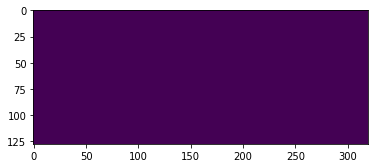

In [6]:
plt.imshow(input_img[0, :, :, 1])

In [7]:
import numpy as np

In [8]:
a = np.arange([[1,2,3],[4,5,6]])

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [9]:
a

NameError: name 'a' is not defined

In [10]:
a = np.array([[1,2,3],[4,5,6]])

In [11]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
a.flatten.reshape(a.shape)

AttributeError: 'builtin_function_or_method' object has no attribute 'reshape'

In [13]:
a.shape

(2, 3)

In [14]:
a.flatten().reshape(2,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [1]:
from lookback.lookback_ops import *

ValueError: attempted relative import beyond top-level package

In [1]:
from lookback.lookback_ops import *

ModuleNotFoundError: No module named 'keras_model'

In [1]:
from lookback.lookback_ops import *

ModuleNotFoundError: No module named 'lookback.config'

In [1]:
from lookback.lookback_ops import *

ValueError: attempted relative import beyond top-level package

In [1]:
from lookback.lookback_ops import *

In [2]:
config = return_a_config()
output_layer = 'conv2'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [3]:
config = return_a_config()
output_layer = 'conv3'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

ValueError: Variable vgg_16/conv1/conv1_1/weights already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 216, in variable
    use_resource=use_resource)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 181, in func_with_args
    return func(*args, **current_args)
  File "/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 261, in model_variable
    use_resource=use_resource)


In [1]:
from lookback.lookback_ops import *
config = return_a_config()
output_layer = 'conv2'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback.lookback_ops import *
config = return_a_config()
output_layer = 'conv3'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [1]:
from lookback.lookback_ops import *
config = return_a_config()
output_layer = 'conv4'
batch_img_list, result, labels, stage = test_lb_vgg(config, output_layer, top_k_activation=5)
simple_save_result_from_test_lb(batch_img_list, result, labels, stage, config, output_layer)

INFO:tensorflow:Restoring parameters from /Users/junr/Documents/prp/pic_data/model/6-10/max.ckpt


/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/junr/pyenv/tf_py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
